# ZMQ Throughput 

This notebook displays the results for ZMQ throughput testing. 

Currently this notebook explores throughput for the REQ/REP Network. 

In [2]:
import os 
import json 

import pandas as pd
import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt

%matplotlib inline 
sns.set_style('whitegrid')
sns.set_context('notebook')
mpl.rcParams['figure.figsize'] = (12,8)

In [2]:
def load_results(path):
    with open(path, 'r') as f:
        for line in f:
            yield json.loads(line)


def load_multi_results(path="results", **extra):
    for name in os.listdir(path):
        fpath = os.path.join(path, name, "results.json")
        for result in load_results(fpath):
            result.update(extra)
            result['host'] = name 
            yield result

## Single Host Throughput 

This experiment measures the throughput such that all processes, client and server are on a single machine. The network consists of **3 server processes** and a variable number of client processes. Clients send a message to a single server, which broadcasts the message to the other two servers, when it receives two responses, it responds to the client. The latency is measured at the client, and the server throughput is computed as the sum of messages divided by the sum of the latency. 

In [3]:
shdf = pd.DataFrame(load_multi_results())
shdf.head()

,host,latency (nsec),messages,n_clients,name,throughput (msg/sec)
0,hyperion.cs.umd.edu,28525982905,96281,3,hyperion40,3375.203593
1,hyperion.cs.umd.edu,28526036214,96258,3,hyperion40,3374.391005
2,hyperion.cs.umd.edu,28525280000,96288,3,hyperion40,3375.532160
3,hyperion.cs.umd.edu,27441805677,200621,1,hyperion40,7310.779850
4,hyperion.cs.umd.edu,27803790588,143889,2,hyperion40,5175.157666


In [19]:
shdf = shdf.groupby(['n_clients', 'host']).sum().reset_index()

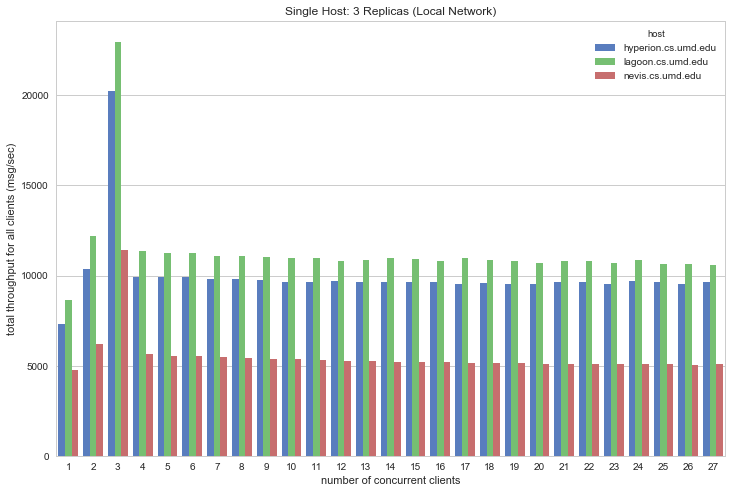

In [26]:
g = sns.barplot(
    x='n_clients', y='throughput (msg/sec)', hue='host', palette='muted', data=shdf,
)

g.set_title("Single Host: 3 Replicas (Local Network)")
g.set_ylabel("total throughput for all clients (msg/sec)")
g.set_xlabel("number of concurrent clients")

plt.savefig("singlehost-3replicas-localnetwork.pdf")

## Log Create Throughput 

This measures how many writes to the log file a machine can handle in a fixed amount of time. 

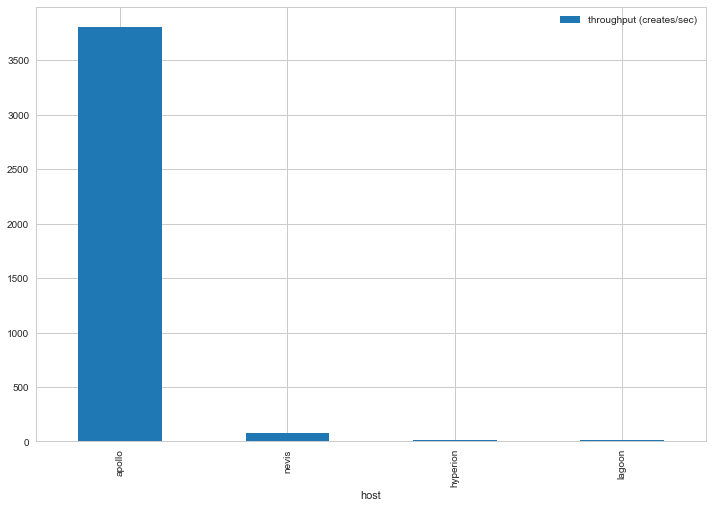

In [5]:
ltdf = pd.DataFrame([
    {'host': 'apollo', 'throughput (creates/sec)': 3803.782},
    {'host': 'nevis', 'throughput (creates/sec)': 73.085},
    {'host': 'hyperion', 'throughput (creates/sec)': 13.581},
    {'host': 'lagoon', 'throughput (creates/sec)': 11.113},
])

ltdf.plot(x='host', y='throughput (creates/sec)', kind='bar')

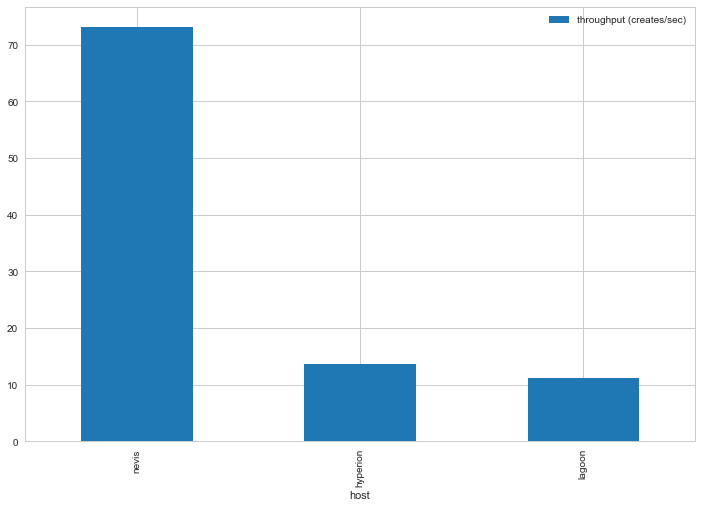

In [7]:
ltdf = pd.DataFrame([
    {'host': 'nevis', 'throughput (creates/sec)': 73.085},
    {'host': 'hyperion', 'throughput (creates/sec)': 13.581},
    {'host': 'lagoon', 'throughput (creates/sec)': 11.113},
])

ltdf.plot(x='host', y='throughput (creates/sec)', kind='bar')